In [6]:
class SGD: # stochastic gradient descent
    def __init__(self,lr = 0.01):
        self.lr = lr; # learngin rate
    def update(self,params,grads):
        for key in params.keys():
            params[key] -= self.lr*grads[key];

In [10]:
class Momentum: # v : velocity
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None 
    def update(self, params, grads):
        if self.v is None: # initialization 
            self.v = {}
            for key, val in params.items():                                
                self.v[key] = np.zeros_like(val)
        for key in params.keys():
            #  momentum*v : 아무 힘을 받지 않을 때 서서히 하강
            # learning_rate*gradient : SGD와 동일하게 기울기에 따른 힘을 가한다
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] 
            params[key] += self.v[key]

In [14]:
class AdaGrad: # adaptive learnging rate decay
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    def update(self, params, grads):
        if self.h is None: # initialization
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        # h 를 통해 각각의 매개변수에 학습률을 다르게 조정한다
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)
            # 1e-7을 더하는 이유 : ZeroDivideError를 막기위해

In [20]:
class Adam: # Momentum + AdaGrad 
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

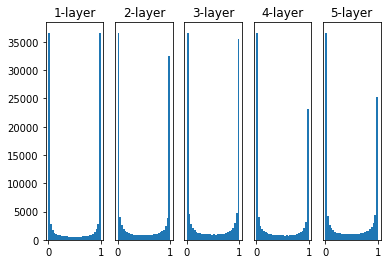

In [33]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    
    # Xavier initialization
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    
    # He initialization
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    #z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


============== 1/16 ==============
epoch:0 | 0.105 - 0.1


C:\Users\정성엽\Underground_DeepLearning\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\정성엽\Underground_DeepLearning\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\정성엽\Underground_DeepLearning\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
C:\Users\정성엽\Underground_DeepLearning\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:1 | 0.097 - 0.091
epoch:2 | 0.097 - 0.113
epoch:3 | 0.097 - 0.133
epoch:4 | 0.097 - 0.164
epoch:5 | 0.097 - 0.195
epoch:6 | 0.097 - 0.206
epoch:7 | 0.097 - 0.227
epoch:8 | 0.097 - 0.252
epoch:9 | 0.097 - 0.281
epoch:10 | 0.097 - 0.293
epoch:11 | 0.097 - 0.314
epoch:12 | 0.097 - 0.327
epoch:13 | 0.097 - 0.352
epoch:14 | 0.097 - 0.367
epoch:15 | 0.097 - 0.379
epoch:16 | 0.097 - 0.393
epoch:17 | 0.097 - 0.408
epoch:18 | 0.097 - 0.42


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.422
============== 2/16 ==============
epoch:0 | 0.087 - 0.132
epoch:1 | 0.097 - 0.113
epoch:2 | 0.097 - 0.122
epoch:3 | 0.097 - 0.146
epoch:4 | 0.097 - 0.161
epoch:5 | 0.097 - 0.182
epoch:6 | 0.097 - 0.2
epoch:7 | 0.097 - 0.223
epoch:8 | 0.097 - 0.243
epoch:9 | 0.097 - 0.259
epoch:10 | 0.097 - 0.28
epoch:11 | 0.097 - 0.297
epoch:12 | 0.097 - 0.314
epoch:13 | 0.097 - 0.334
epoch:14 | 0.097 - 0.352
epoch:15 | 0.097 - 0.376
epoch:16 | 0.097 - 0.404
epoch:17 | 0.097 - 0.412
epoch:18 | 0.097 - 0.44
epoch:19 | 0.097 - 0.449

No handles with labels found to put in legend.



============== 3/16 ==============
epoch:0 | 0.115 - 0.095
epoch:1 | 0.216 - 0.1
epoch:2 | 0.355 - 0.135
epoch:3 | 0.448 - 0.166
epoch:4 | 0.513 - 0.208
epoch:5 | 0.589 - 0.248
epoch:6 | 0.642 - 0.286
epoch:7 | 0.675 - 0.331
epoch:8 | 0.721 - 0.363
epoch:9 | 0.731 - 0.392
epoch:10 | 0.767 - 0.431
epoch:11 | 0.794 - 0.451
epoch:12 | 0.821 - 0.48
epoch:13 | 0.826 - 0.5
epoch:14 | 0.846 - 0.523
epoch:15 | 0.87 - 0.537
epoch:16 | 0.879 - 0.577
epoch:17 | 0.893 - 0.594
epoch:18 | 0.903 - 0.613


No handles with labels found to put in legend.


epoch:19 | 0.905 - 0.628
============== 4/16 ==============
epoch:0 | 0.119 - 0.106
epoch:1 | 0.254 - 0.166
epoch:2 | 0.396 - 0.215
epoch:3 | 0.503 - 0.274
epoch:4 | 0.595 - 0.327
epoch:5 | 0.637 - 0.37
epoch:6 | 0.662 - 0.431
epoch:7 | 0.703 - 0.472
epoch:8 | 0.734 - 0.527
epoch:9 | 0.747 - 0.565
epoch:10 | 0.771 - 0.604
epoch:11 | 0.789 - 0.631
epoch:12 | 0.794 - 0.663
epoch:13 | 0.813 - 0.689
epoch:14 | 0.826 - 0.702
epoch:15 | 0.84 - 0.714
epoch:16 | 0.846 - 0.731
epoch:17 | 0.85 - 0.745
epoch:18 | 0.865 - 0.761


No handles with labels found to put in legend.


epoch:19 | 0.865 - 0.774
============== 5/16 ==============
epoch:0 | 0.096 - 0.086
epoch:1 | 0.106 - 0.144
epoch:2 | 0.108 - 0.315
epoch:3 | 0.109 - 0.415
epoch:4 | 0.111 - 0.518
epoch:5 | 0.112 - 0.598
epoch:6 | 0.119 - 0.655
epoch:7 | 0.118 - 0.692
epoch:8 | 0.121 - 0.731
epoch:9 | 0.125 - 0.748
epoch:10 | 0.137 - 0.772
epoch:11 | 0.137 - 0.794
epoch:12 | 0.144 - 0.817
epoch:13 | 0.135 - 0.832
epoch:14 | 0.141 - 0.842
epoch:15 | 0.142 - 0.849
epoch:16 | 0.146 - 0.857
epoch:17 | 0.145 - 0.869
epoch:18 | 0.151 - 0.88


No handles with labels found to put in legend.


epoch:19 | 0.153 - 0.891
============== 6/16 ==============
epoch:0 | 0.099 - 0.092
epoch:1 | 0.12 - 0.13
epoch:2 | 0.118 - 0.391
epoch:3 | 0.133 - 0.564
epoch:4 | 0.145 - 0.642
epoch:5 | 0.146 - 0.698
epoch:6 | 0.153 - 0.734
epoch:7 | 0.15 - 0.76
epoch:8 | 0.119 - 0.779
epoch:9 | 0.182 - 0.815
epoch:10 | 0.2 - 0.834
epoch:11 | 0.193 - 0.849
epoch:12 | 0.203 - 0.863
epoch:13 | 0.204 - 0.889
epoch:14 | 0.203 - 0.907
epoch:15 | 0.172 - 0.918
epoch:16 | 0.117 - 0.929
epoch:17 | 0.117 - 0.931
epoch:18 | 0.117 - 0.944


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.951
============== 7/16 ==============
epoch:0 | 0.116 - 0.144
epoch:1 | 0.117 - 0.285
epoch:2 | 0.116 - 0.541
epoch:3 | 0.116 - 0.687
epoch:4 | 0.116 - 0.761
epoch:5 | 0.116 - 0.8
epoch:6 | 0.116 - 0.832
epoch:7 | 0.116 - 0.865
epoch:8 | 0.117 - 0.885
epoch:9 | 0.126 - 0.9
epoch:10 | 0.117 - 0.916
epoch:11 | 0.117 - 0.926
epoch:12 | 0.117 - 0.937
epoch:13 | 0.116 - 0.949
epoch:14 | 0.116 - 0.961
epoch:15 | 0.116 - 0.963
epoch:16 | 0.117 - 0.978
epoch:17 | 0.117 - 0.986
epoch:18 | 0.116 - 0.986


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.989
============== 8/16 ==============
epoch:0 | 0.105 - 0.145
epoch:1 | 0.116 - 0.44
epoch:2 | 0.116 - 0.672
epoch:3 | 0.116 - 0.753
epoch:4 | 0.116 - 0.792
epoch:5 | 0.116 - 0.838
epoch:6 | 0.116 - 0.881
epoch:7 | 0.116 - 0.909
epoch:8 | 0.116 - 0.94
epoch:9 | 0.116 - 0.953
epoch:10 | 0.117 - 0.978
epoch:11 | 0.117 - 0.984
epoch:12 | 0.117 - 0.987
epoch:13 | 0.117 - 0.992
epoch:14 | 0.117 - 0.995
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.996
epoch:17 | 0.117 - 0.997
epoch:18 | 0.117 - 0.996


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.997
============== 9/16 ==============
epoch:0 | 0.092 - 0.092
epoch:1 | 0.105 - 0.512
epoch:2 | 0.117 - 0.74
epoch:3 | 0.117 - 0.809
epoch:4 | 0.117 - 0.86
epoch:5 | 0.105 - 0.88
epoch:6 | 0.117 - 0.91
epoch:7 | 0.117 - 0.969
epoch:8 | 0.117 - 0.988
epoch:9 | 0.117 - 0.993
epoch:10 | 0.117 - 0.995
epoch:11 | 0.117 - 0.998
epoch:12 | 0.117 - 0.997
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.999
============== 10/16 ==============
epoch:0 | 0.117 - 0.107
epoch:1 | 0.099 - 0.553
epoch:2 | 0.116 - 0.693
epoch:3 | 0.117 - 0.723
epoch:4 | 0.117 - 0.757
epoch:5 | 0.117 - 0.79
epoch:6 | 0.116 - 0.795
epoch:7 | 0.116 - 0.83
epoch:8 | 0.116 - 0.884
epoch:9 | 0.116 - 0.938
epoch:10 | 0.116 - 0.99
epoch:11 | 0.116 - 0.997
epoch:12 | 0.116 - 0.996
epoch:13 | 0.116 - 0.985
epoch:14 | 0.116 - 0.995
epoch:15 | 0.116 - 0.993
epoch:16 | 0.116 - 0.996
epoch:17 | 0.116 - 0.995
epoch:18 | 0.116 - 0.998


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.998
============== 11/16 ==============
epoch:0 | 0.1 - 0.149
epoch:1 | 0.117 - 0.552
epoch:2 | 0.117 - 0.711
epoch:3 | 0.117 - 0.711
epoch:4 | 0.117 - 0.821
epoch:5 | 0.117 - 0.846
epoch:6 | 0.117 - 0.913
epoch:7 | 0.117 - 0.857
epoch:8 | 0.117 - 0.906
epoch:9 | 0.117 - 0.976
epoch:10 | 0.117 - 0.98
epoch:11 | 0.117 - 0.96
epoch:12 | 0.117 - 0.852
epoch:13 | 0.117 - 0.97
epoch:14 | 0.117 - 0.979
epoch:15 | 0.117 - 0.992
epoch:16 | 0.117 - 0.981
epoch:17 | 0.117 - 0.997
epoch:18 | 0.117 - 0.997


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.997
============== 12/16 ==============
epoch:0 | 0.097 - 0.182
epoch:1 | 0.117 - 0.706
epoch:2 | 0.117 - 0.704
epoch:3 | 0.105 - 0.713
epoch:4 | 0.117 - 0.808
epoch:5 | 0.105 - 0.762
epoch:6 | 0.117 - 0.867
epoch:7 | 0.117 - 0.875
epoch:8 | 0.117 - 0.763
epoch:9 | 0.117 - 0.877
epoch:10 | 0.117 - 0.864
epoch:11 | 0.117 - 0.881
epoch:12 | 0.117 - 0.896
epoch:13 | 0.117 - 0.891
epoch:14 | 0.117 - 0.9
epoch:15 | 0.117 - 0.9
epoch:16 | 0.117 - 0.901
epoch:17 | 0.117 - 0.901
epoch:18 | 0.117 - 0.902


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.993
============== 13/16 ==============
epoch:0 | 0.116 - 0.19
epoch:1 | 0.116 - 0.409
epoch:2 | 0.116 - 0.55
epoch:3 | 0.116 - 0.556
epoch:4 | 0.117 - 0.576
epoch:5 | 0.116 - 0.637
epoch:6 | 0.117 - 0.599
epoch:7 | 0.116 - 0.649
epoch:8 | 0.117 - 0.665
epoch:9 | 0.117 - 0.659
epoch:10 | 0.117 - 0.646
epoch:11 | 0.117 - 0.666
epoch:12 | 0.117 - 0.654
epoch:13 | 0.117 - 0.679
epoch:14 | 0.117 - 0.663
epoch:15 | 0.117 - 0.703
epoch:16 | 0.117 - 0.699
epoch:17 | 0.117 - 0.638
epoch:18 | 0.117 - 0.777


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.796
============== 14/16 ==============
epoch:0 | 0.117 - 0.099
epoch:1 | 0.116 - 0.451
epoch:2 | 0.116 - 0.545
epoch:3 | 0.116 - 0.586
epoch:4 | 0.117 - 0.521
epoch:5 | 0.117 - 0.571
epoch:6 | 0.117 - 0.598
epoch:7 | 0.117 - 0.6
epoch:8 | 0.117 - 0.607
epoch:9 | 0.117 - 0.616
epoch:10 | 0.117 - 0.605
epoch:11 | 0.117 - 0.617
epoch:12 | 0.117 - 0.621
epoch:13 | 0.117 - 0.625
epoch:14 | 0.117 - 0.62
epoch:15 | 0.117 - 0.625
epoch:16 | 0.117 - 0.622
epoch:17 | 0.117 - 0.621
epoch:18 | 0.117 - 0.623


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.631
============== 15/16 ==============
epoch:0 | 0.097 - 0.117
epoch:1 | 0.116 - 0.274
epoch:2 | 0.116 - 0.387
epoch:3 | 0.117 - 0.403
epoch:4 | 0.117 - 0.408
epoch:5 | 0.117 - 0.413
epoch:6 | 0.117 - 0.395
epoch:7 | 0.117 - 0.413
epoch:8 | 0.117 - 0.407
epoch:9 | 0.117 - 0.414
epoch:10 | 0.117 - 0.416
epoch:11 | 0.117 - 0.515
epoch:12 | 0.117 - 0.521
epoch:13 | 0.117 - 0.522
epoch:14 | 0.117 - 0.503
epoch:15 | 0.117 - 0.513
epoch:16 | 0.116 - 0.477
epoch:17 | 0.116 - 0.513
epoch:18 | 0.117 - 0.518


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.519
============== 16/16 ==============
epoch:0 | 0.092 - 0.099
epoch:1 | 0.1 - 0.304
epoch:2 | 0.117 - 0.313
epoch:3 | 0.117 - 0.399
epoch:4 | 0.117 - 0.411
epoch:5 | 0.117 - 0.415
epoch:6 | 0.117 - 0.417
epoch:7 | 0.117 - 0.417
epoch:8 | 0.117 - 0.417
epoch:9 | 0.117 - 0.419
epoch:10 | 0.117 - 0.409
epoch:11 | 0.117 - 0.425
epoch:12 | 0.117 - 0.401
epoch:13 | 0.117 - 0.425
epoch:14 | 0.117 - 0.427
epoch:15 | 0.117 - 0.432
epoch:16 | 0.117 - 0.432
epoch:17 | 0.117 - 0.432
epoch:18 | 0.117 - 0.433
epoch:19 | 0.117 - 0.433


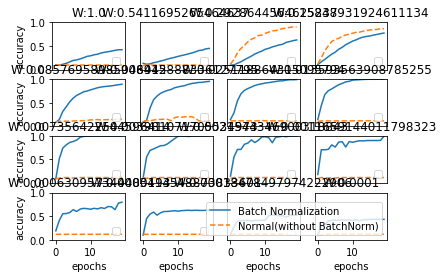

In [34]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.10666666666666667, test acc:0.1008
epoch:1, train acc:0.12666666666666668, test acc:0.1085
epoch:2, train acc:0.14333333333333334, test acc:0.1167
epoch:3, train acc:0.15, test acc:0.1196
epoch:4, train acc:0.17333333333333334, test acc:0.1302
epoch:5, train acc:0.19666666666666666, test acc:0.1367
epoch:6, train acc:0.22666666666666666, test acc:0.1452
epoch:7, train acc:0.24666666666666667, test acc:0.1604
epoch:8, train acc:0.24666666666666667, test acc:0.1697
epoch:9, train acc:0.27666666666666667, test acc:0.1872
epoch:10, train acc:0.31333333333333335, test acc:0.2092
epoch:11, train acc:0.3433333333333333, test acc:0.2218
epoch:12, train acc:0.36333333333333334, test acc:0.2368
epoch:13, train acc:0.38666666666666666, test acc:0.2532
epoch:14, train acc:0.4166666666666667, test acc:0.269
epoch:15, train acc:0.43333333333333335, test acc:0.2882
epoch:16, train acc:0.46, test acc:0.2938
epoch:17, train acc:0.49333333333333335, test acc:0.314
epoch:18, train ac

epoch:163, train acc:1.0, test acc:0.7721
epoch:164, train acc:1.0, test acc:0.7701
epoch:165, train acc:1.0, test acc:0.7695
epoch:166, train acc:1.0, test acc:0.7705
epoch:167, train acc:1.0, test acc:0.7707
epoch:168, train acc:1.0, test acc:0.7702
epoch:169, train acc:1.0, test acc:0.7707
epoch:170, train acc:1.0, test acc:0.7711
epoch:171, train acc:1.0, test acc:0.771
epoch:172, train acc:1.0, test acc:0.7724
epoch:173, train acc:1.0, test acc:0.7728
epoch:174, train acc:1.0, test acc:0.7724
epoch:175, train acc:1.0, test acc:0.7729
epoch:176, train acc:1.0, test acc:0.7737
epoch:177, train acc:1.0, test acc:0.7739
epoch:178, train acc:1.0, test acc:0.7743
epoch:179, train acc:1.0, test acc:0.7724
epoch:180, train acc:1.0, test acc:0.7716
epoch:181, train acc:1.0, test acc:0.7716
epoch:182, train acc:1.0, test acc:0.7739
epoch:183, train acc:1.0, test acc:0.7731
epoch:184, train acc:1.0, test acc:0.772
epoch:185, train acc:1.0, test acc:0.7731
epoch:186, train acc:1.0, test acc:0

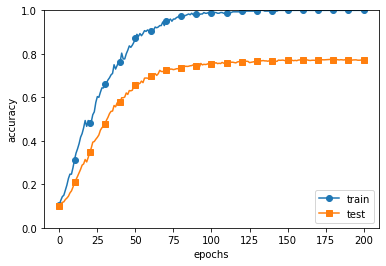

In [37]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
#weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


train loss:2.2869615549697393
=== epoch:1, train acc:0.09, test acc:0.1077 ===
train loss:2.2996404306968543
train loss:2.3056243254611353
train loss:2.3060765283039775
=== epoch:2, train acc:0.09, test acc:0.1071 ===
train loss:2.279325822218675
train loss:2.2920720493042976
train loss:2.284918606809031
=== epoch:3, train acc:0.08666666666666667, test acc:0.1087 ===
train loss:2.2786446020703672
train loss:2.2790198846205403
train loss:2.2890188983098603
=== epoch:4, train acc:0.08666666666666667, test acc:0.1096 ===
train loss:2.2942780684804878
train loss:2.2858560380944972
train loss:2.3012676617462575
=== epoch:5, train acc:0.08333333333333333, test acc:0.1098 ===
train loss:2.2838056705386194
train loss:2.286705473115529
train loss:2.2942981286168784
=== epoch:6, train acc:0.08666666666666667, test acc:0.1125 ===
train loss:2.2854209042354285
train loss:2.277741136226708
train loss:2.2852386321310014
=== epoch:7, train acc:0.08666666666666667, test acc:0.1139 ===
train loss:2.294

=== epoch:56, train acc:0.2733333333333333, test acc:0.2473 ===
train loss:2.2442905467831094
train loss:2.235378100815847
train loss:2.2201682724902723
=== epoch:57, train acc:0.27, test acc:0.2495 ===
train loss:2.211489481165431
train loss:2.2342891588122114
train loss:2.2209284168128867
=== epoch:58, train acc:0.27, test acc:0.2516 ===
train loss:2.2166365414042706
train loss:2.2218354775366653
train loss:2.2194350001942924
=== epoch:59, train acc:0.28, test acc:0.251 ===
train loss:2.226989372020658
train loss:2.211420442402037
train loss:2.1878519538350343
=== epoch:60, train acc:0.27666666666666667, test acc:0.253 ===
train loss:2.2061838824491176
train loss:2.2227081462086136
train loss:2.2082890806516366
=== epoch:61, train acc:0.2733333333333333, test acc:0.2557 ===
train loss:2.208633190178747
train loss:2.2369812886779097
train loss:2.2188709569518488
=== epoch:62, train acc:0.2833333333333333, test acc:0.2569 ===
train loss:2.2289331558836087
train loss:2.228398117084643
t

=== epoch:111, train acc:0.38666666666666666, test acc:0.3224 ===
train loss:2.087977359073345
train loss:2.1114045195021545
train loss:2.116310437663196
=== epoch:112, train acc:0.3933333333333333, test acc:0.326 ===
train loss:2.105957656544465
train loss:2.1015396088259486
train loss:2.1249405020521253
=== epoch:113, train acc:0.4, test acc:0.3326 ===
train loss:2.118201096706805
train loss:2.1249977208106285
train loss:2.087597781787798
=== epoch:114, train acc:0.4033333333333333, test acc:0.3345 ===
train loss:2.1218625036896612
train loss:2.085814657579577
train loss:2.071164928058398
=== epoch:115, train acc:0.39, test acc:0.3333 ===
train loss:2.109993231302569
train loss:2.1044774080463027
train loss:2.10427608959442
=== epoch:116, train acc:0.3933333333333333, test acc:0.3344 ===
train loss:2.0925957514887172
train loss:2.099692872941263
train loss:2.078520138471103
=== epoch:117, train acc:0.41, test acc:0.3409 ===
train loss:2.0978969150482984
train loss:2.099127145863466
t

=== epoch:166, train acc:0.4533333333333333, test acc:0.4132 ===
train loss:1.8681677252721025
train loss:1.8926715002968946
train loss:1.8487528722635198
=== epoch:167, train acc:0.45666666666666667, test acc:0.4145 ===
train loss:1.7805086574551257
train loss:1.9044928959808871
train loss:1.7730891856898772
=== epoch:168, train acc:0.45666666666666667, test acc:0.4157 ===
train loss:1.9395178589966204
train loss:1.814473844881971
train loss:1.8277314931125266
=== epoch:169, train acc:0.46, test acc:0.4178 ===
train loss:1.8301623613942348
train loss:1.7972833727442594
train loss:1.8140789862857367
=== epoch:170, train acc:0.4533333333333333, test acc:0.4154 ===
train loss:1.8749030672644935
train loss:1.9010789881199175
train loss:1.9033208020676287
=== epoch:171, train acc:0.45666666666666667, test acc:0.4164 ===
train loss:1.8352150716997158
train loss:1.856362128714647
train loss:1.892874675587727
=== epoch:172, train acc:0.4533333333333333, test acc:0.4159 ===
train loss:1.798385

=== epoch:221, train acc:0.48, test acc:0.435 ===
train loss:1.6418183435640912
train loss:1.6359380839412423
train loss:1.5340793021319785
=== epoch:222, train acc:0.48, test acc:0.431 ===
train loss:1.4708234075050024
train loss:1.6030956605225537
train loss:1.6019754599894482
=== epoch:223, train acc:0.49333333333333335, test acc:0.4333 ===
train loss:1.581606568444505
train loss:1.6045487496225623
train loss:1.5573606898930064
=== epoch:224, train acc:0.49666666666666665, test acc:0.4339 ===
train loss:1.5597107036509386
train loss:1.4630109198137595
train loss:1.5638819171194513
=== epoch:225, train acc:0.49333333333333335, test acc:0.4359 ===
train loss:1.5148929382069665
train loss:1.5877282006329916
train loss:1.583103967388889
=== epoch:226, train acc:0.49, test acc:0.4362 ===
train loss:1.5709252941688867
train loss:1.591030312598148
train loss:1.5558289757094559
=== epoch:227, train acc:0.4866666666666667, test acc:0.438 ===
train loss:1.552712742595967
train loss:1.52970955

=== epoch:276, train acc:0.5966666666666667, test acc:0.4852 ===
train loss:1.0990820168898758
train loss:1.2610827464201713
train loss:1.233981798332578
=== epoch:277, train acc:0.6033333333333334, test acc:0.4887 ===
train loss:1.1717794668824821
train loss:1.2479047437840542
train loss:1.2963891825158798
=== epoch:278, train acc:0.6, test acc:0.4882 ===
train loss:1.2523232855364834
train loss:1.259800351690451
train loss:1.263541491526443
=== epoch:279, train acc:0.6, test acc:0.4888 ===
train loss:1.1994004788974948
train loss:1.280355073507793
train loss:1.329074470685343
=== epoch:280, train acc:0.6, test acc:0.4967 ===
train loss:1.1376739779437848
train loss:1.2578041662340163
train loss:1.258367770482596
=== epoch:281, train acc:0.6066666666666667, test acc:0.495 ===
train loss:1.288983029284691
train loss:1.4606798691276401
train loss:1.2108604407261054
=== epoch:282, train acc:0.6133333333333333, test acc:0.4986 ===
train loss:1.3326132654861838
train loss:1.251254148592752

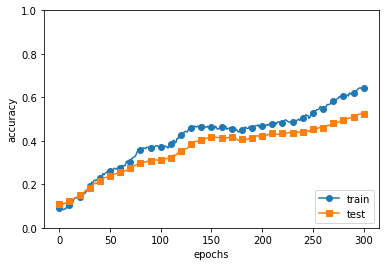

In [39]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

val acc:0.18 | lr:0.0001757051554099641, weight decay:1.0438247117012393e-06
val acc:0.11 | lr:0.0006900915413601017, weight decay:2.8387994937508183e-08
val acc:0.15 | lr:1.5077470550905542e-05, weight decay:7.043558405187689e-08
val acc:0.07 | lr:0.00020349735058529093, weight decay:9.883405965794879e-08
val acc:0.11 | lr:0.00016156450718351613, weight decay:3.183432175518286e-06
val acc:0.74 | lr:0.007541266681927202, weight decay:4.892942676900427e-06
val acc:0.05 | lr:6.79328561284991e-06, weight decay:2.3973072878708174e-07
val acc:0.13 | lr:1.507037468667381e-05, weight decay:1.3416891348593356e-08
val acc:0.09 | lr:8.130797753766603e-05, weight decay:8.551566429292403e-07
val acc:0.1 | lr:3.159845578768706e-05, weight decay:6.70857341698224e-08
val acc:0.09 | lr:1.1582884232834009e-05, weight decay:1.0297857384498868e-07
val acc:0.34 | lr:0.00209938310051703, weight decay:8.537359877497848e-08
val acc:0.4 | lr:0.0023934369085769937, weight decay:1.379914925961771e-06
val acc:0.

Best-8(val acc:0.58) | lr:0.004415629628170688, weight decay:2.013577155148873e-06
Best-9(val acc:0.56) | lr:0.0033301768588943972, weight decay:1.148130227683101e-05
Best-10(val acc:0.44) | lr:0.003046378359841455, weight decay:1.0467063983221638e-08
Best-11(val acc:0.44) | lr:0.004509003942900095, weight decay:7.260125007002214e-05
Best-12(val acc:0.4) | lr:0.0023934369085769937, weight decay:1.379914925961771e-06
Best-13(val acc:0.4) | lr:0.0026040355479126395, weight decay:5.753075620946675e-05
Best-14(val acc:0.4) | lr:0.0023309045254802205, weight decay:1.143502161730781e-05
Best-15(val acc:0.39) | lr:0.0034119548348582984, weight decay:9.723613224634368e-07
Best-16(val acc:0.35) | lr:0.002116369602540149, weight decay:3.7543024532639445e-08
Best-17(val acc:0.34) | lr:0.00209938310051703, weight decay:8.537359877497848e-08
Best-18(val acc:0.34) | lr:0.0020681939025371347, weight decay:2.922925907306278e-06
Best-19(val acc:0.3) | lr:0.0033256514210681844, weight decay:3.7455978974

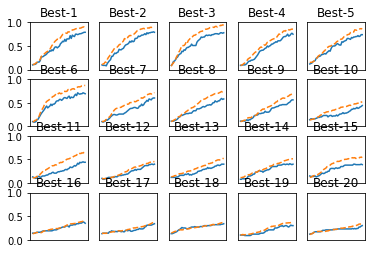

In [40]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()